In [6]:
import matplotlib.pyplot as plt
from skimage import io, filters, feature
import numpy
# from scipy import fftpack
# import scipy
import numpy as np
import numpy.fft as fftpack

In [2]:
image = io.imread('character.tif').astype('float64')

# Fourier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  """


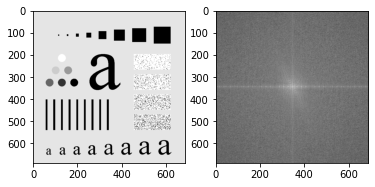

In [3]:
# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = scipy.log10(1+scipy.absolute(fftpack.fft2(image)))
imageFFT = fftpack.fftshift(imageFFT)

# Plot
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imageFFT, cmap='gray')

plt.show()

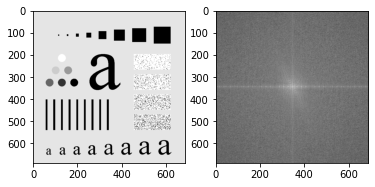

In [7]:
# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = 20 * np.log10(1 + np.absolute(np.fft.fft2(image)))
imageFFT = np.fft.fftshift(imageFFT)
# imageFFT = scipy.log10(1+scipy.absolute(fftpack.fft2(image)))
# imageFFT = fftpack.fftshift(imageFFT)

# Plot
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imageFFT, cmap='gray')

plt.show()

# BLPF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead


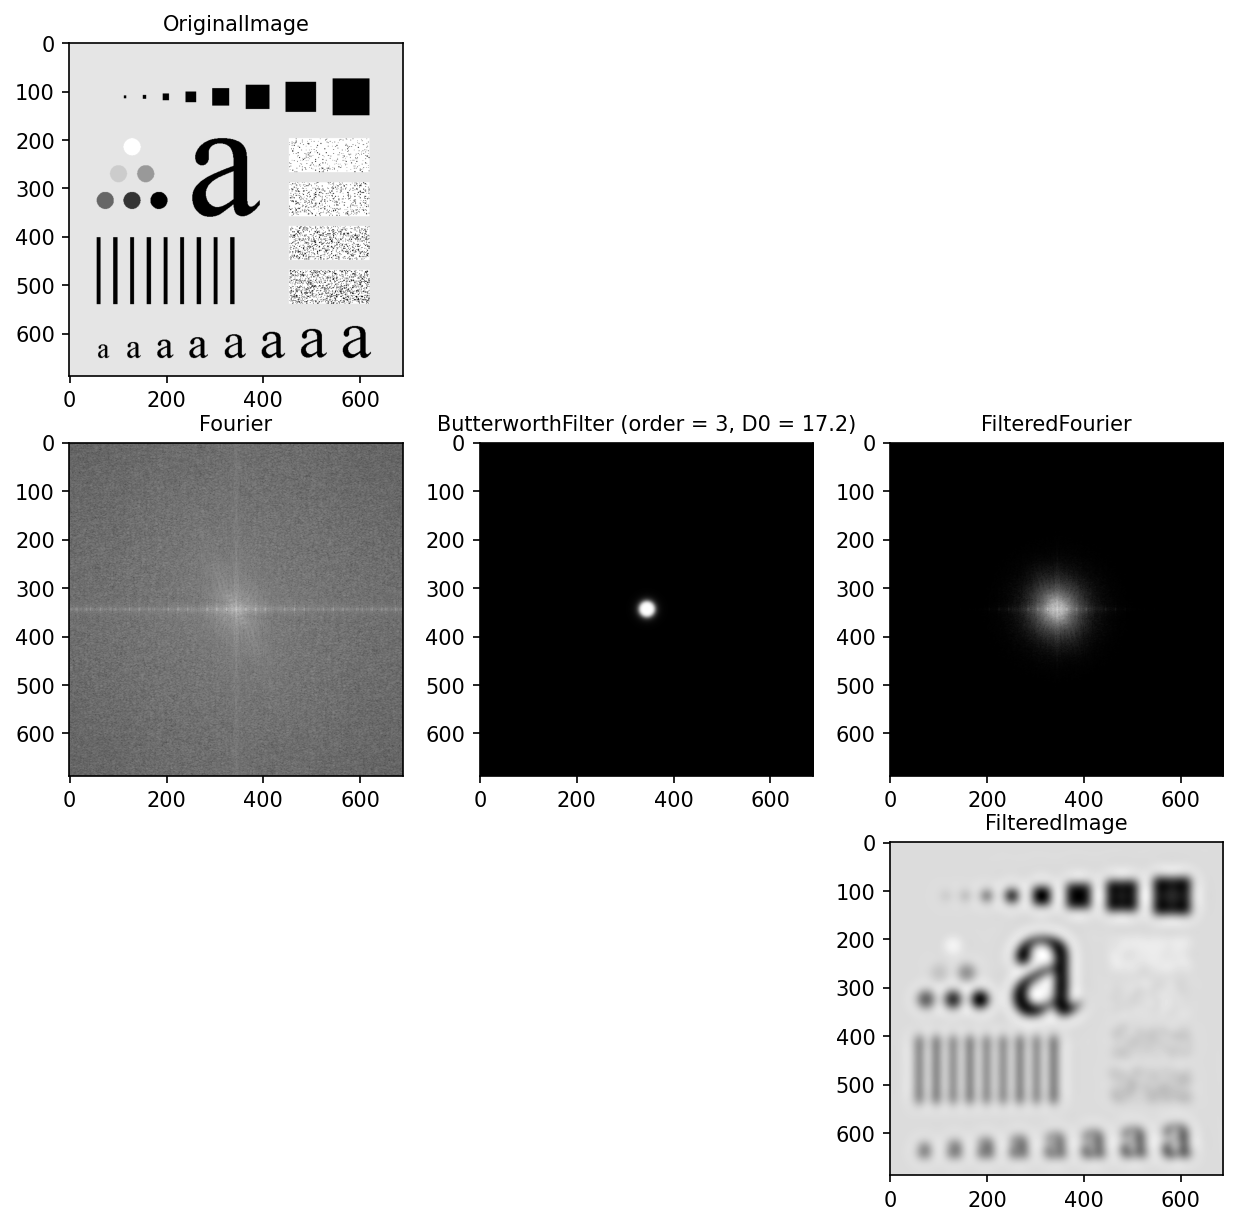

In [8]:
# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = fftpack.fft2(image)
imageFFT = fftpack.fftshift(imageFFT)

# Butterworth Filter
sizeI, sizeJ = image.shape
n = 3  # order
d0 = sizeI/40  # cutoff fregquency

ButterworthFilter = numpy.zeros(image.shape)
i = 0
while i < sizeI:
    j = 0
    while j < sizeJ:
        Duv = pow(i - (sizeI-1)/2, 2) + pow(j - (sizeJ-1)/2, 2)
        ButterworthFilter[i, j] = 1 / (1 + pow(Duv/pow(d0, 2), n))
        j += 1
    i += 1

# Apply filter
imageFFTFiltered = numpy.multiply(imageFFT, ButterworthFilter)

# Inverse Fourier Transform
imageIFFT = fftpack.ifftshift(imageFFTFiltered)
imageFiltered = numpy.real(fftpack.ifft2(imageIFFT))

# Plot
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('OriginalImage', {'fontsize': 10})
plt.subplot(3, 3, 4)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFT)), cmap='gray')
plt.title('Fourier', {'fontsize': 10})
plt.subplot(3, 3, 5)
plt.imshow(ButterworthFilter, cmap='gray')
plt.title('ButterworthFilter (order = ' + str(n) + ', D0 = ' + str(d0) + ')', {'fontsize': 10})
plt.subplot(3, 3, 6)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFTFiltered)), cmap='gray')
plt.title('FilteredFourier', {'fontsize': 10})
plt.subplot(3, 3, 9)
plt.imshow(imageFiltered, cmap='gray')
plt.title('FilteredImage', {'fontsize': 10})

plt.show()

# GLPF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead


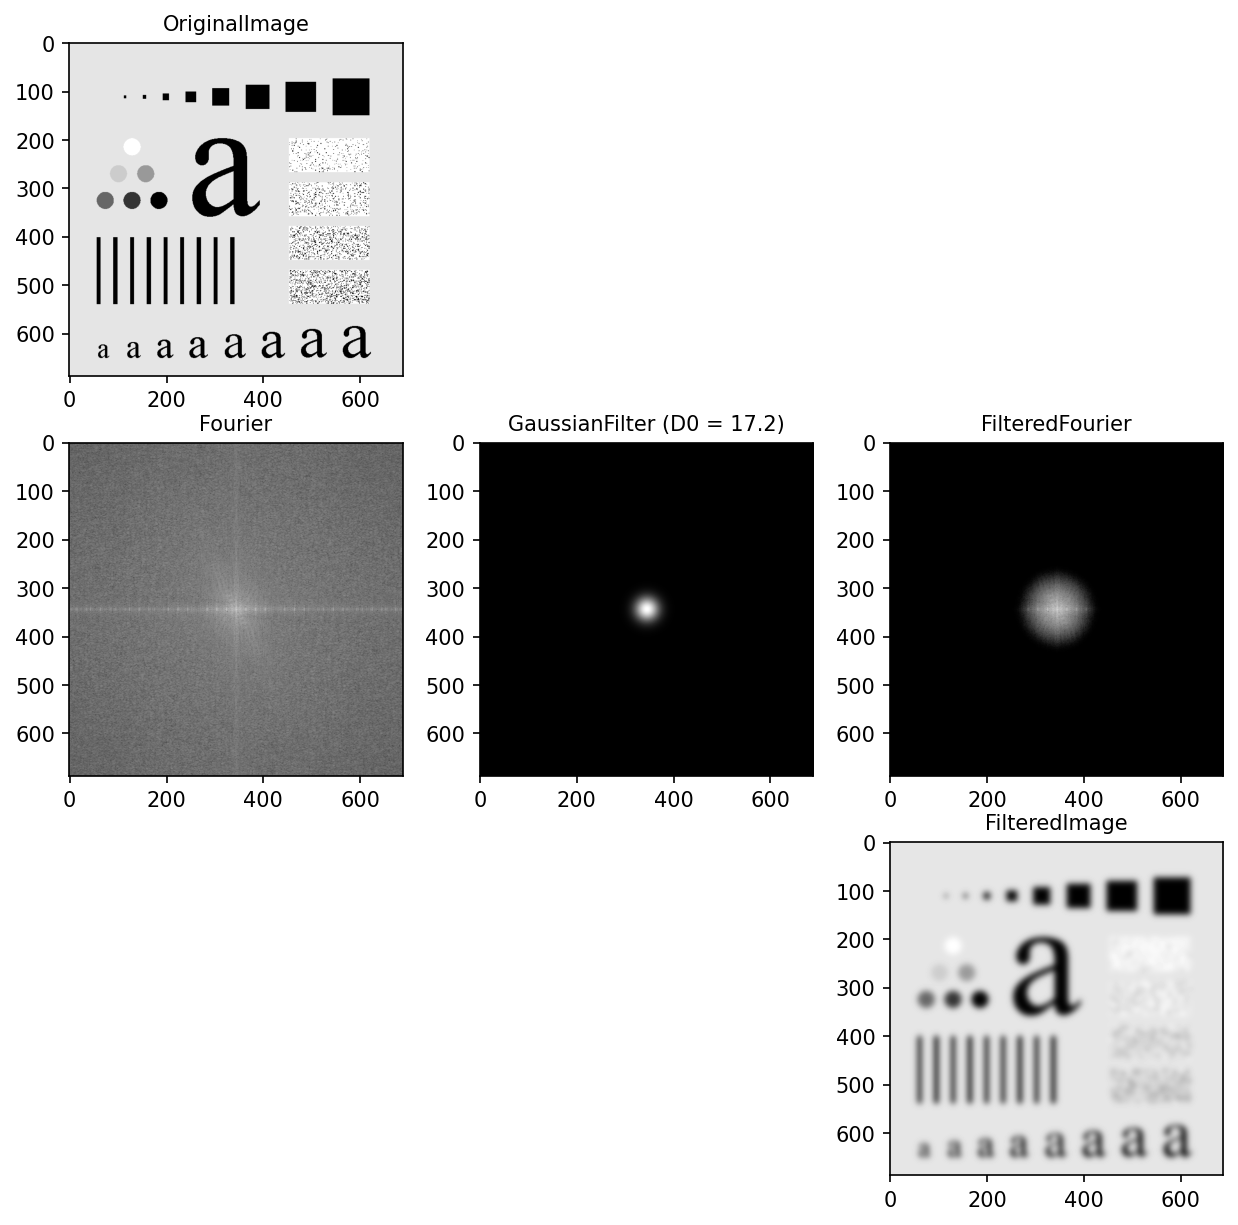

In [ ]:
from scipy import signal

def gkern(kernlen, nsig):
    # Return 2D Gaussian Kernel
    gkern1d = signal.gaussian(kernlen, std=nsig).reshape(kernlen, 1)
    kernel = numpy.outer(gkern1d, gkern1d)

    return kernel


# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = fftpack.fft2(image)
imageFFT = fftpack.fftshift(imageFFT)

# Gaussian Filter
sizeI, sizeJ = image.shape
d0 = sizeI/40  # cutoff fregquency, equivalent with sigma

GaussianFilter = gkern(sizeI, d0)

# Apply filter
imageFFTFiltered = numpy.multiply(imageFFT, GaussianFilter)

# Inverse Fourier Transform
imageIFFT = fftpack.ifftshift(imageFFTFiltered)
imageFiltered = numpy.real(fftpack.ifft2(imageIFFT))

# Plot
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('OriginalImage', {'fontsize': 10})
plt.subplot(3, 3, 4)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFT)), cmap='gray')
plt.title('Fourier', {'fontsize': 10})
plt.subplot(3, 3, 5)
plt.imshow(GaussianFilter, cmap='gray')
plt.title('GaussianFilter (D0 = ' + str(d0) + ')', {'fontsize': 10})
plt.subplot(3, 3, 6)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFTFiltered)), cmap='gray')
plt.title('FilteredFourier', {'fontsize': 10})
plt.subplot(3, 3, 9)
plt.imshow(imageFiltered, cmap='gray')
plt.title('FilteredImage', {'fontsize': 10})

plt.show()

# BHPF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead


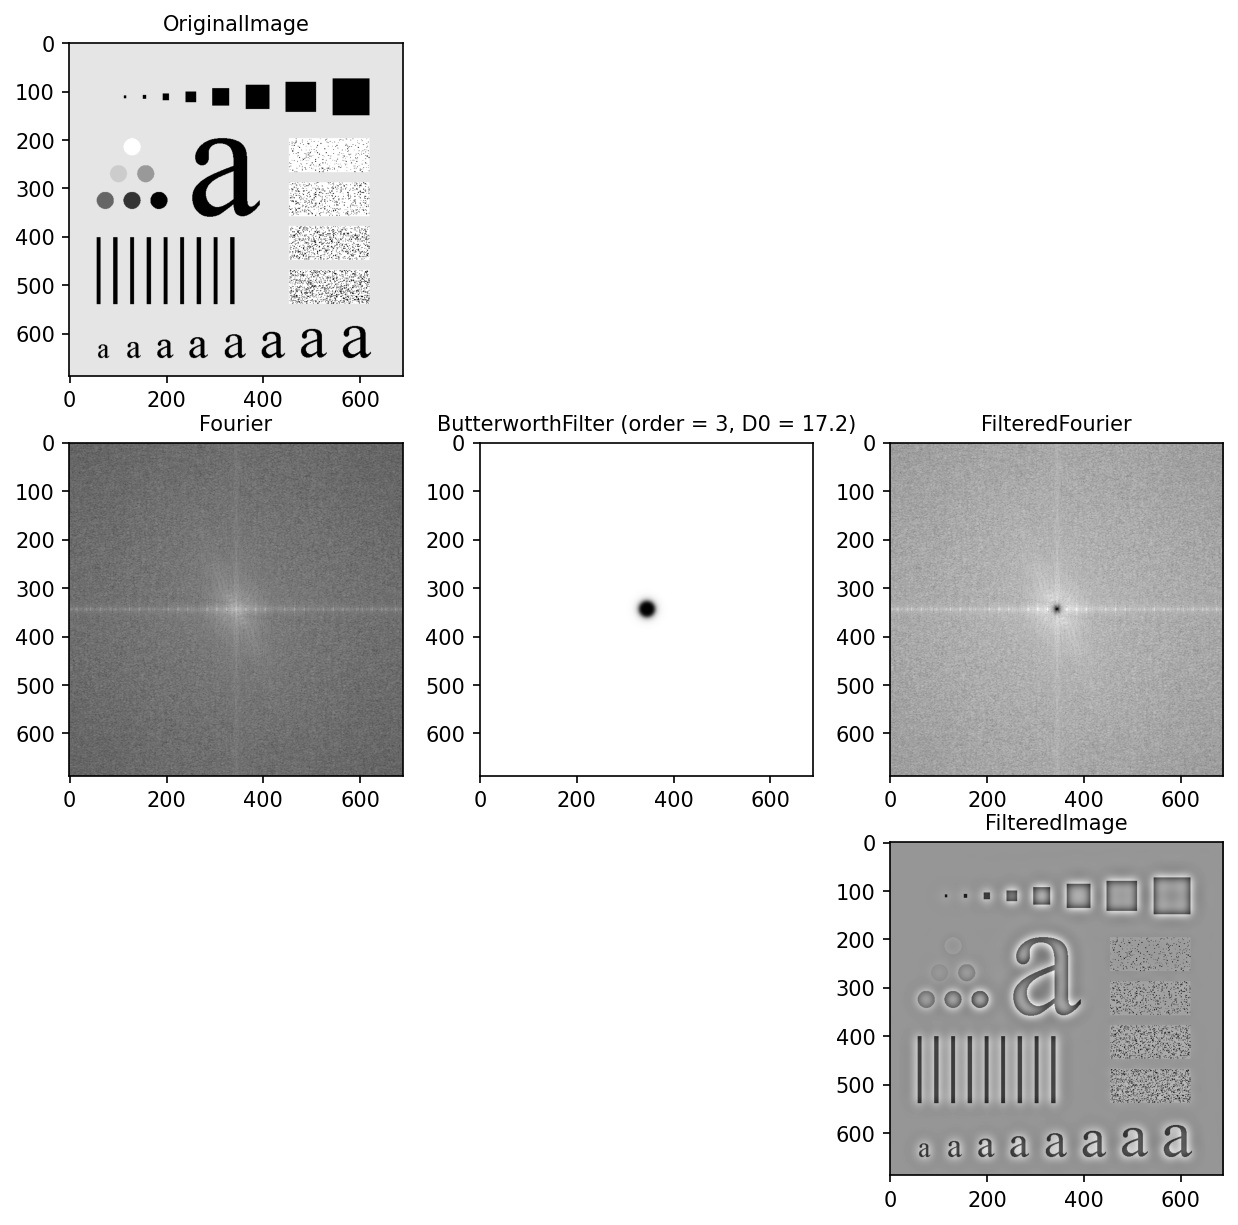

In [ ]:
# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = fftpack.fft2(image)
imageFFT = fftpack.fftshift(imageFFT)

# Butterworth Filter
sizeI, sizeJ = image.shape
n = 3  # order
d0 = sizeI/40  # cutoff fregquency

ButterworthFilter = numpy.zeros(image.shape)
i = 0
while i < sizeI:
    j = 0
    while j < sizeJ:
        Duv = pow(i - (sizeI-1)/2, 2) + pow(j - (sizeJ-1)/2, 2)
        ButterworthFilter[i, j] = 1 - 1 / (1 + pow(Duv/pow(d0, 2), n))
        j += 1
    i += 1

# Apply filter
imageFFTFiltered = numpy.multiply(imageFFT, ButterworthFilter)

# Inverse Fourier Transform
imageIFFT = fftpack.ifftshift(imageFFTFiltered)
imageFiltered = numpy.real(fftpack.ifft2(imageIFFT))

# Plot
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('OriginalImage', {'fontsize': 10})
plt.subplot(3, 3, 4)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFT)), cmap='gray')
plt.title('Fourier', {'fontsize': 10})
plt.subplot(3, 3, 5)
plt.imshow(ButterworthFilter, cmap='gray')
plt.title('ButterworthFilter (order = ' + str(n) + ', D0 = ' + str(d0) + ')', {'fontsize': 10})
plt.subplot(3, 3, 6)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFTFiltered)), cmap='gray')
plt.title('FilteredFourier', {'fontsize': 10})
plt.subplot(3, 3, 9)
plt.imshow(imageFiltered, cmap='gray')
plt.title('FilteredImage', {'fontsize': 10})

plt.show()

# GHPF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead


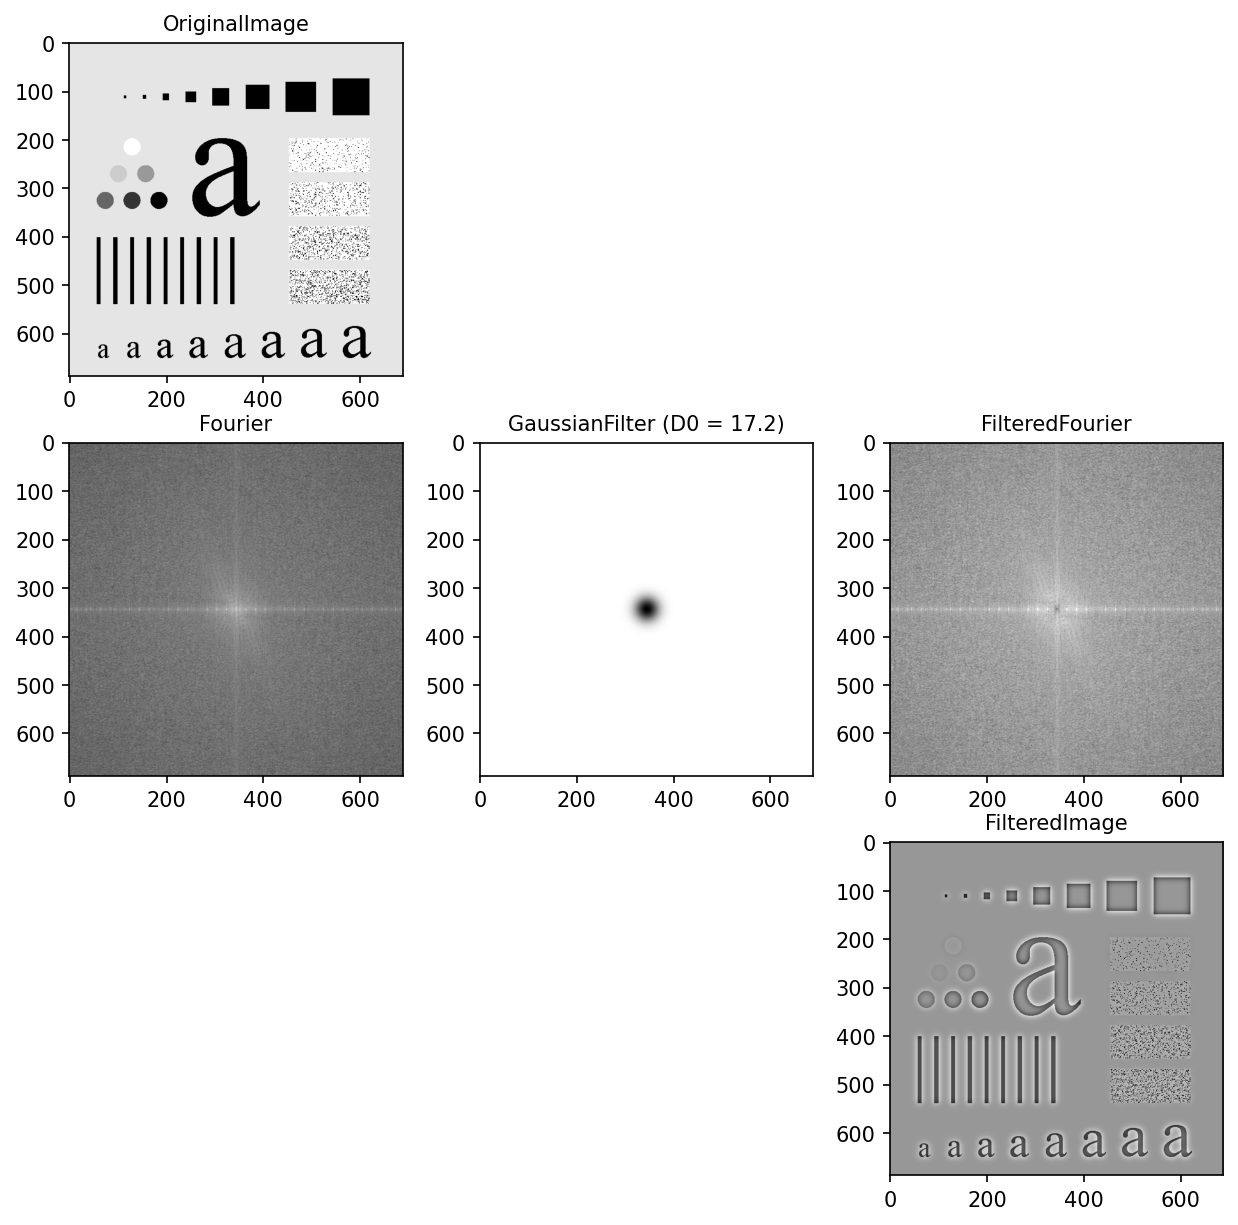

In [ ]:
from scipy import signal

def gkern(kernlen, nsig):
    # Return 2D Gaussian Kernel
    gkern1d = signal.gaussian(kernlen, std=nsig).reshape(kernlen, 1)
    kernel = numpy.outer(gkern1d, gkern1d)

    return kernel


# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = fftpack.fft2(image)
imageFFT = fftpack.fftshift(imageFFT)

# Gaussian Filter
sizeI, sizeJ = image.shape
d0 = sizeI/40  # cutoff fregquency, equivalent with sigma

GaussianFilter = 1 - gkern(sizeI, d0)

# Apply filter
imageFFTFiltered = numpy.multiply(imageFFT, GaussianFilter)

# Inverse Fourier Transform
imageIFFT = fftpack.ifftshift(imageFFTFiltered)
imageFiltered = numpy.real(fftpack.ifft2(imageIFFT))

# Plot
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('OriginalImage', {'fontsize': 10})
plt.subplot(3, 3, 4)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFT)), cmap='gray')
plt.title('Fourier', {'fontsize': 10})
plt.subplot(3, 3, 5)
plt.imshow(GaussianFilter, cmap='gray')
plt.title('GaussianFilter (D0 = ' + str(d0) + ')', {'fontsize': 10})
plt.subplot(3, 3, 6)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFTFiltered)), cmap='gray')
plt.title('FilteredFourier', {'fontsize': 10})
plt.subplot(3, 3, 9)
plt.imshow(imageFiltered, cmap='gray')
plt.title('FilteredImage', {'fontsize': 10})

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead


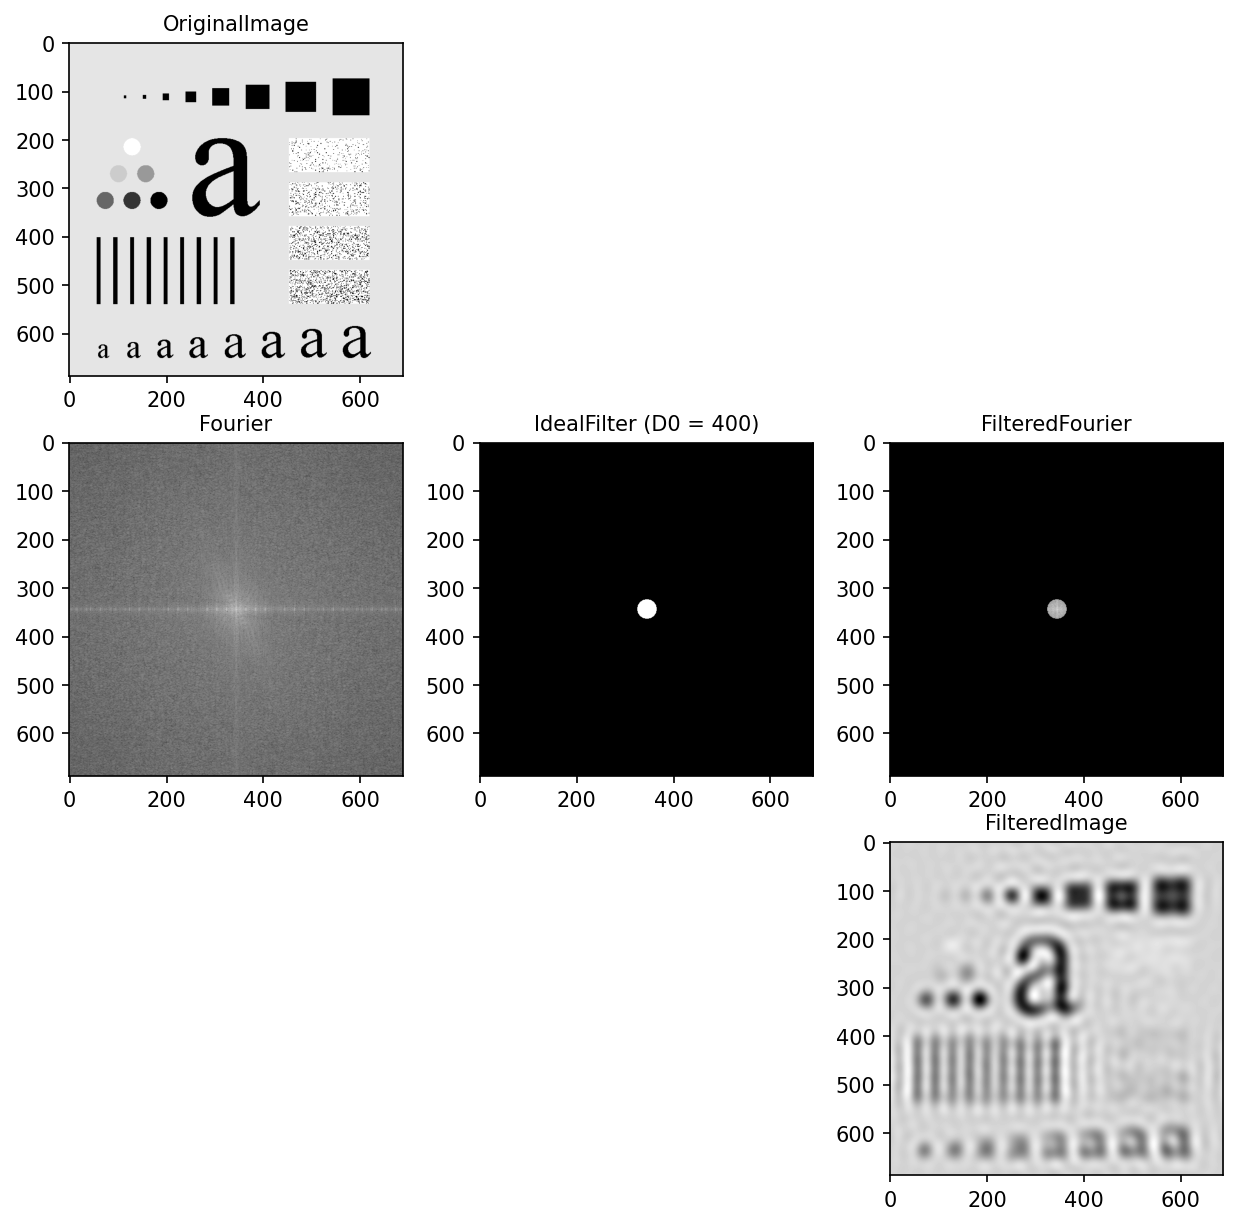

In [11]:
# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = fftpack.fft2(image)
imageFFT = fftpack.fftshift(imageFFT)

# Butterworth Filter
sizeI, sizeJ = image.shape
d0 = 400  # cutoff fregquency

IdealFilter = numpy.zeros(image.shape)
i = 0
while i < sizeI:
    j = 0
    while j < sizeJ:
        Duv = pow(i - (sizeI-1)/2, 2) + pow(j - (sizeJ-1)/2, 2)
        if Duv <= d0:
            Huv = 1
        else:
            Huv = 0
        IdealFilter[i, j] = Huv
        j += 1
    i += 1

# Apply filter
imageFFTFiltered = numpy.multiply(imageFFT, IdealFilter)

# Inverse Fourier Transform
imageIFFT = fftpack.ifftshift(imageFFTFiltered)
imageFiltered = numpy.real(fftpack.ifft2(imageIFFT))

# Plot
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('OriginalImage', {'fontsize': 10})
plt.subplot(3, 3, 4)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFT)), cmap='gray')
plt.title('Fourier', {'fontsize': 10})
plt.subplot(3, 3, 5)
plt.imshow(IdealFilter, cmap='gray')
plt.title('IdealFilter (D0 = ' + str(d0) + ')', {'fontsize': 10})
plt.subplot(3, 3, 6)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFTFiltered)), cmap='gray')
plt.title('FilteredFourier', {'fontsize': 10})
plt.subplot(3, 3, 9)
plt.imshow(imageFiltered, cmap='gray')
plt.title('FilteredImage', {'fontsize': 10})

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead


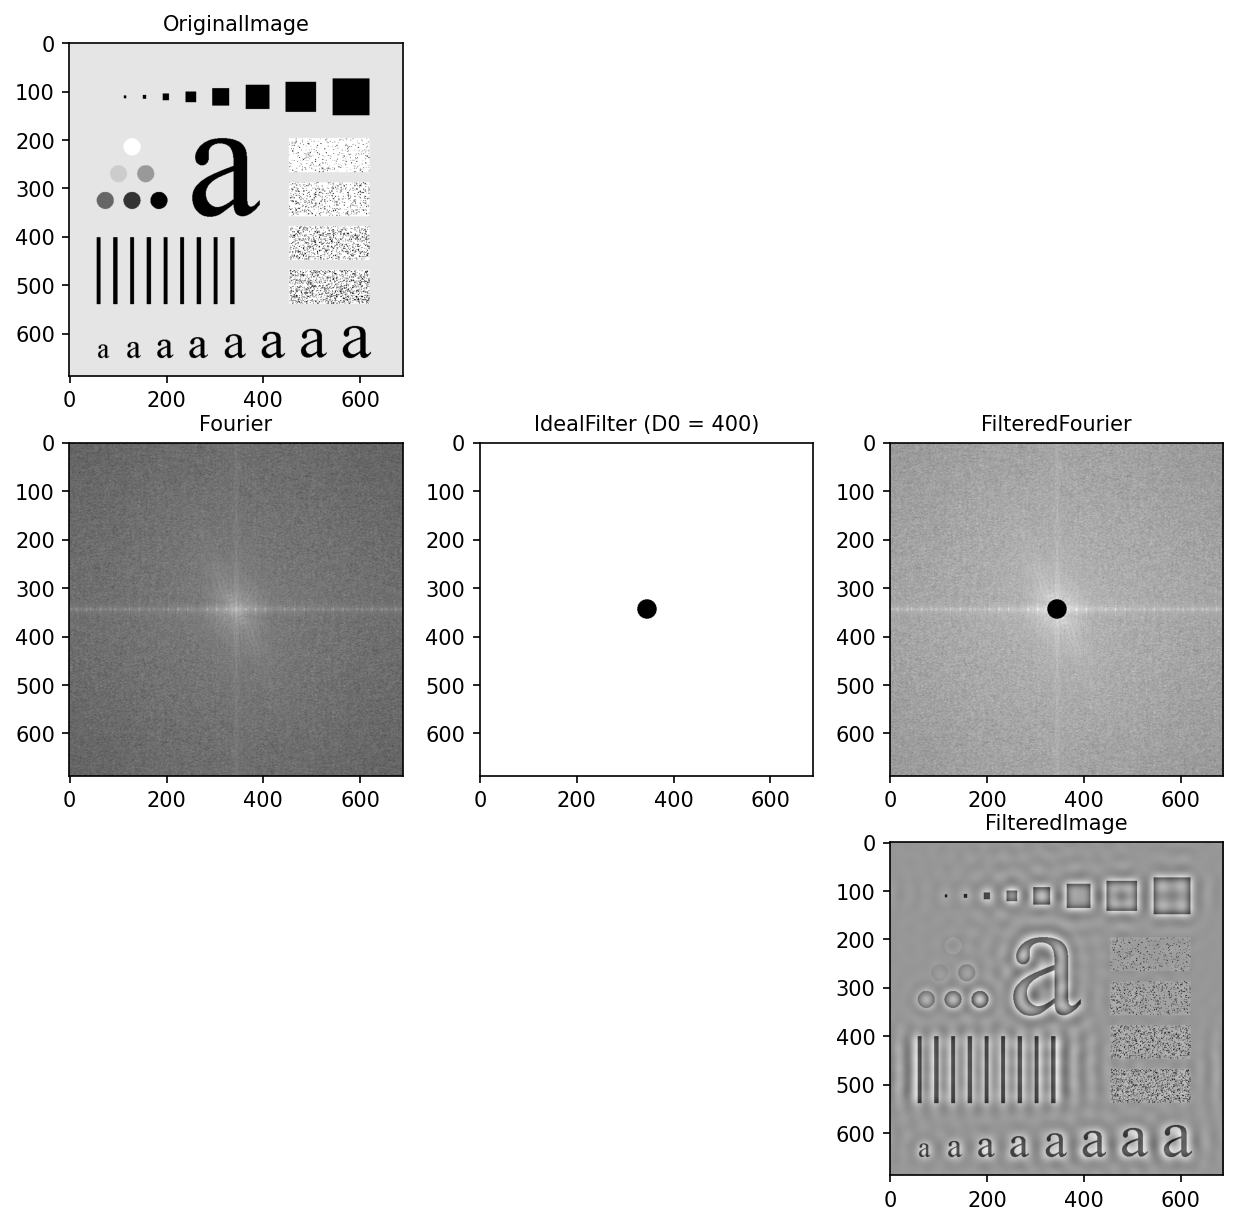

In [12]:
# Load image file
image = io.imread('character.tif').astype('float64')

# Fourier Transform
imageFFT = fftpack.fft2(image)
imageFFT = fftpack.fftshift(imageFFT)

# Butterworth Filter
sizeI, sizeJ = image.shape
d0 = 400  # cutoff fregquency

IdealFilter = numpy.zeros(image.shape)
i = 0
while i < sizeI:
    j = 0
    while j < sizeJ:
        Duv = pow(i - (sizeI-1)/2, 2) + pow(j - (sizeJ-1)/2, 2)
        if Duv <= d0:
            Huv = 0
        else:
            Huv = 1
        IdealFilter[i, j] = Huv
        j += 1
    i += 1

# Apply filter
imageFFTFiltered = numpy.multiply(imageFFT, IdealFilter)

# Inverse Fourier Transform
imageIFFT = fftpack.ifftshift(imageFFTFiltered)
imageFiltered = numpy.real(fftpack.ifft2(imageIFFT))

# Plot
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('OriginalImage', {'fontsize': 10})
plt.subplot(3, 3, 4)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFT)), cmap='gray')
plt.title('Fourier', {'fontsize': 10})
plt.subplot(3, 3, 5)
plt.imshow(IdealFilter, cmap='gray')
plt.title('IdealFilter (D0 = ' + str(d0) + ')', {'fontsize': 10})
plt.subplot(3, 3, 6)
plt.imshow(scipy.log10(1+scipy.absolute(imageFFTFiltered)), cmap='gray')
plt.title('FilteredFourier', {'fontsize': 10})
plt.subplot(3, 3, 9)
plt.imshow(imageFiltered, cmap='gray')
plt.title('FilteredImage', {'fontsize': 10})

plt.show()